In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [0]:
total=[17,79,132,229,322,400,650,888,1128,1689,1835,2502,3089,3858,4636,5883,7375,9172,10149,12462,15113,
       17660,17750,23980,27980,31506,35713,41035,47021,53578,59138,63927,69176,74386,80539,86498,92472,97689,101739,105792]

In [0]:
death=[0,2,2,6,11,12,17,21,29,35,52,80,107,148,197,233,366,464,631,827,1016,1268,1441,1811,2158,2505,
       2978,3407,4032,4827,5476,6077,6820,7505,8165,9136,10023,10781,11591,12430]

In [0]:
recovered=[1,2,1,1,3,45,46,46,83,149,160,276,414,523,589,622,724,724,1045,1045,1439,1966,2335,2749,
           2941,4025,4440,4440,6072,7024,7432,8326,9362,10361,10950,12384,13030,14620,15729,17000]

In [0]:
a=len(total)
b=len(death)
c=len(recovered)
print(a)
print(b)
print(c)

40
40
40


In [0]:
R=[x+y for x,y in zip(death,recovered)]


In [0]:
I=[x-y for x,y in zip(total,R)]

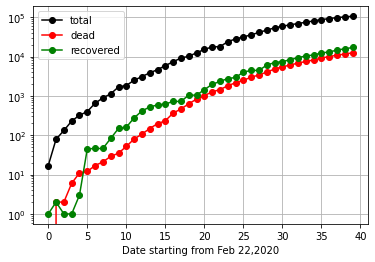

<Figure size 432x288 with 0 Axes>

In [0]:
plt.figure();
plt.plot(total,'o-k');
plt.plot(death,'o-r');
plt.plot(recovered,'o-g');
plt.legend(['total','dead','recovered'])
plt.grid(1);
plt.yscale('log')
plt.xlabel('Date starting from Feb 22,2020')
plt.figure();

In [0]:
en=len(total);
st=en-7;
y=np.log(I[st:en])


In [0]:
t=np.array(range(st,en))

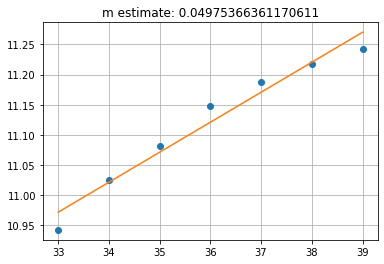

In [0]:
m,b=np.polyfit(t,y,1)
plt.plot(t,(y),'o')
plt.plot(t,(m*t+b))
plt.title('m estimate: %s' %m)
plt.grid()

gamma=0.028928 beta=0.0786817 R0=2.71991


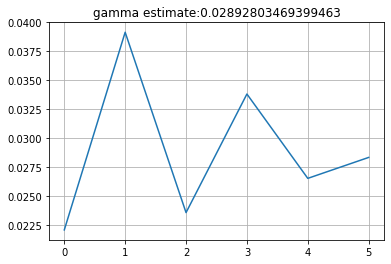

In [0]:
plt.figure()
g=[]
for i in range(st,en-1):
     oo=(R[i+1]-R[i])/I[i]
     g.append(oo)
    
plt.plot(g)
plt.grid(1)
gamma=np.mean(g);
plt.title('gamma estimate:%s' %gamma)

beta=m+gamma
print('gamma=%g beta=%g R0=%g' %(gamma,beta,beta/gamma))

In [0]:
def SIR(S0,I0,R0,t0,t1,beta,gamma):
    N=S0+R0+I0;
    S=S0;R=R0;I=I0;
    SS=[S0];RR=[R0];II=[I0];
    tt=[t0];
    dt=0.1;
    t=t0
    while t<= t1:
        dS=-beta*S*I/N
        dI=beta*S*I/N-gamma*I
        dR=gamma*I
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

Text(0.5, 1.0, 'tmax=145.9, imax=26.5%  Tota Infected:91.75%')

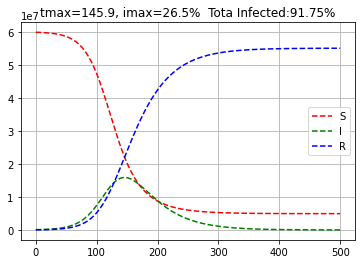

In [0]:
SIRT=SIR(6e7, I[en-1], R[en-1], 0, 500, beta, gamma)
tt=SIRT[3];SS=SIRT[0];II=SIRT[1];RR=SIRT[2];
plt.plot(tt,SS,'--r')
plt.plot(tt,II,'--g')
plt.plot(tt,RR,'--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo];
Imax=II[oo];
inftot=RR[-1]/N
plt.title('tmax=%g, imax=%2.3g%%  Tota Infected:%2.4g%%'  % (tmax,Imax/N*100,inftot*100))

In [0]:
# Taking into consideration quarantine effect

In [0]:
def SIR(S0,I0,R0,t0,t1,beta,gamma,rho):
    N=S0+R0+I0;
    S=S0;R=R0;I=I0;
    SS=[S0];RR=[R0];II=[I0];
    tt=[t0];
    dt=0.1;
    t=t0
    while t<= t1:
        dS=-rho*beta*S*I/N
        dI=rho*beta*S*I/N-gamma*I
        dR=gamma*I
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

Text(0.5, 1.0, 'tmax=319.2, imax=8.78%  Total Infected:60.29%')

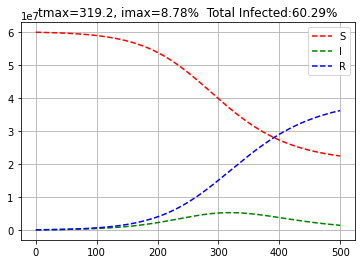

In [0]:
SIRT=SIR(6e7, I[en-1], R[en-1], 0, 500, beta, gamma,0.6)
tt=SIRT[3];SS=SIRT[0];II=SIRT[1];RR=SIRT[2];
plt.plot(tt,SS,'--r')
plt.plot(tt,II,'--g')
plt.plot(tt,RR,'--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo];
Imax=II[oo];
inftot=RR[-1]/N
plt.title('tmax=%g, imax=%2.3g%%  Total Infected:%2.4g%%'  % (tmax,Imax/N*100,inftot*100))

In [0]:
total=[1,4,4,4,5,6,6,6,11,11,14,15,15,26,33,37,41,55,55,55,76,80,83]

In [0]:
death=[0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,3,3,3]

In [0]:
recovered=[0,0,0,0,0,0,0,0,2,2,3,3,4,4,5,5,5,6,7,7,8,8,9]

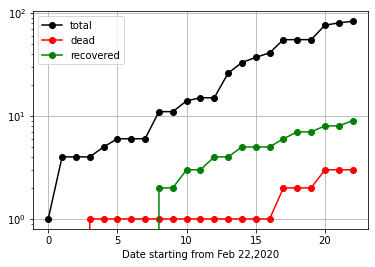

<Figure size 432x288 with 0 Axes>

In [0]:
R=[x+y for x,y in zip(death,recovered)]
I=[x-y for x,y in zip(total,R)]
plt.figure();
plt.plot(total,'o-k');
plt.plot(death,'o-r');
plt.plot(recovered,'o-g');
plt.legend(['total','dead','recovered'])
plt.grid(1);
plt.yscale('log')
plt.xlabel('Date starting from Feb 22,2020')
plt.figure();


en=len(total);st=en-7;
y=np.log(I[st:en])

t=np.array(range(st,en))

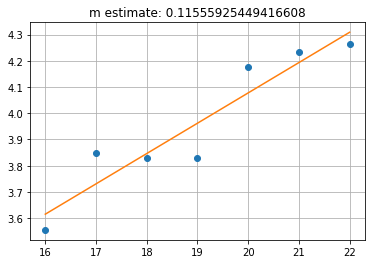

In [0]:
m,b=np.polyfit(t,y,1)
plt.plot(t,(y),'o')
plt.plot(t,(m*t+b))
plt.title('m estimate: %s' %m)
plt.grid()

gamma=0.0227317 beta=0.138291 R0=6.08361


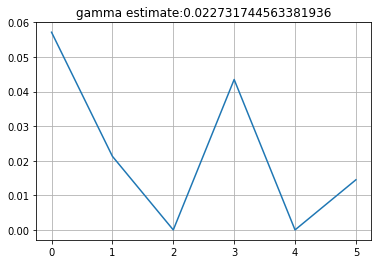

In [0]:
plt.figure()


g=[]
for i in range(st,en-1):
     oo=(R[i+1]-R[i])/I[i]
     g.append(oo)
    
plt.plot(g)
plt.grid(1)
gamma=np.mean(g);
plt.title('gamma estimate:%s' %gamma)

beta=m+gamma
print('gamma=%g beta=%g R0=%g' %(gamma,beta,beta/gamma))

In [0]:
def SIR(S0,I0,R0,t0,t1,beta,gamma,rho):
    N=S0+R0+I0;
    S=S0;R=R0;I=I0;
    SS=[S0];RR=[R0];II=[I0];
    tt=[t0];
    dt=0.1;
    t=t0
    while t<= t1:
        dS=-rho*beta*S*I/N
        dI=rho*beta*S*I/N-gamma*I
        dR=gamma*I
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

Text(0.5, 1.0, 'tmax=300.3, imax=32.7%  Total Infected:93.75%')

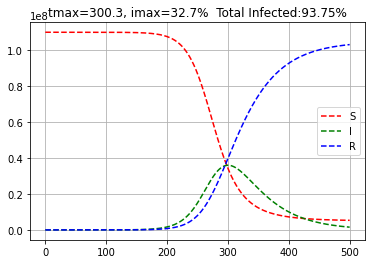

In [0]:
SIRT=SIR(11e7, I[en-1], R[en-1], 0, 500, beta, gamma,0.53)
tt=SIRT[3];SS=SIRT[0];II=SIRT[1];RR=SIRT[2];
plt.plot(tt,SS,'--r')
plt.plot(tt,II,'--g')
plt.plot(tt,RR,'--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo];
Imax=II[oo];
inftot=RR[-1]/N
plt.title('tmax=%g, imax=%2.3g%%  Total Infected:%2.4g%%'  % (tmax,Imax/N*100,inftot*100))

#### 

In [0]:
%%capture
## compile PyRoss for this notebook
import os
owd = os.getcwd()
os.chdir('../')
%run setup.py install
os.chdir(owd)

In [0]:
# !pip install pyros

In [0]:
%matplotlib inline
import numpy as np
# import pyros
import pandas as pd
import matplotlib.pyplot as plt

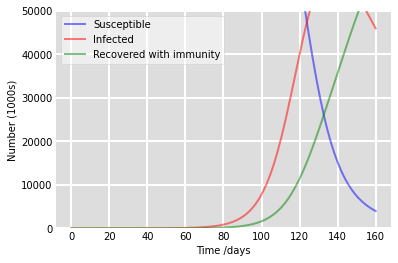

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 110000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 83, 9
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.138291,0.0227317 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,50000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [0]:
# https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

In [0]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def seir_model_with_soc_dist(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

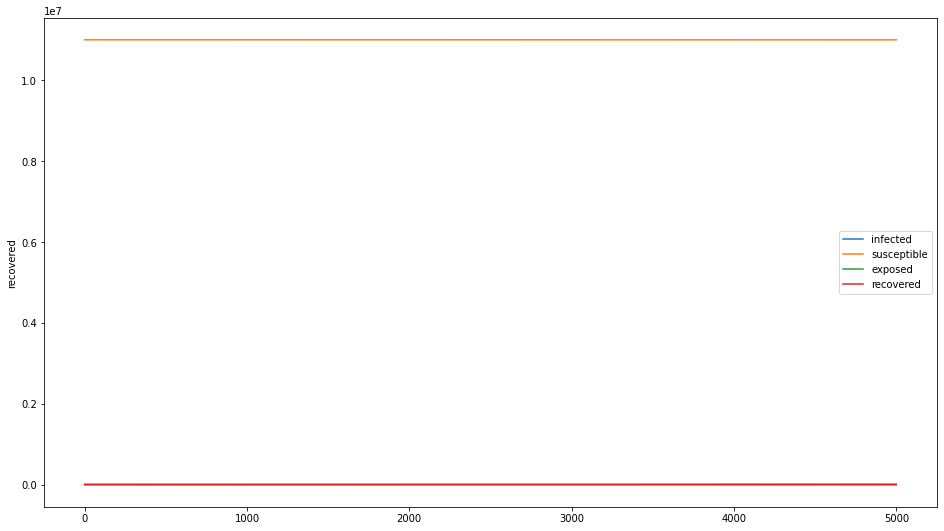

In [0]:
# Define parameters
t_max = 500
dt = .1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 11000000
init_infected = 341
init_exposed = 2500
init_vals = 1 - (init_infected + init_exposed)/N,  init_exposed/N, init_infected/N, 0
alpha = 0.15
# beta = 0.42
beta = 0.0786817
gamma = 0.028928
# gamma = 0.14
rho = 0.1
params = alpha, beta, gamma, rho
# Run simulation
results = seir_model_with_soc_dist(init_vals, params, t)
results_df = pd.DataFrame(results*N, columns=['susceptible', 'exposed',
                               'infected', 'recovered'])
results_df.head()

plt.figure(figsize=(16,9))
sns.lineplot(x=results_df.index, y=results_df['infected'], label='infected')
sns.lineplot(x=results_df.index, y=results_df['susceptible'], label='susceptible')
sns.lineplot(x=results_df.index, y=results_df['exposed'], label='exposed')
sns.lineplot(x=results_df.index, y=results_df['recovered'], label='recovered')

In [0]:
results_df['Date'] = pd.date_range('2020-04-01', periods=results_df.shape[0]).values

In [0]:
results_df.head()

,susceptible,exposed,infected,recovered,Date
0,1.099716e+07,2500.000000,341.000000,0.000000,2020-04-01
1,1.099716e+07,2462.768235,377.513555,0.986445,2020-04-02
2,1.099716e+07,2426.123669,413.363008,2.078516,2020-04-03
3,1.099716e+07,2390.056971,448.559086,3.274293,2020-04-04
4,1.099716e+07,2354.558959,483.112349,4.571884,2020-04-05


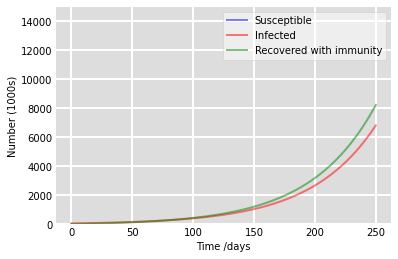

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 83e5
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 63, 19
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
# beta, gamma = 0.138291/3,0.0227317/3
beta, gamma = 0.138291,0.0227317
# A grid of time points (in days)
t = np.linspace(0, 250, 250)
rho = 0.3

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma, rho):
    S, I, R = y
    dSdt = - rho * (beta) * S * I / N
    dIdt = rho*(beta) * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, rho))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,15000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()